In [35]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from keras import regularizers, Sequential, Input, layers
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Normalization
from tensorflow.keras import models

# (1) Compiling

In [2]:
# Regression
# model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# Classification with 2 classes
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Classification with more than 2 classes
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'precision'])

## (1.1) Metrics

In [ ]:
# use strings for quick access
# model.compile(metrics=['accuracy', 'precision'])

# use Keras metric objects for fine-tuning
# auc_metric = keras.metrics.AUC(num_thresholds = 200, curve='ROC') # or curve='PR'
# model.compile(metrics=[auc_metric])

# Custom metrics
# def custom_mse(y_true, y_pred):
#     squared_diff = tf.square(y_true - y_pred)
#     return tf.reduce_mean(squared_diff)
# model.compile(metrics=[custom_msg])

In [4]:
X = tf.ones((3, 3))
X

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [5]:
X.numpy()

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

## (1.2) The loss function L_x(theta)

In [ ]:
# Use strings for quick access
# model.compile(loss="binary_crossentropy")

# Use Keras metric objects for fine-tuning
# loss = keras.losses.BinaryCrossentropy(...)
# model.compile(loss=loss)

# Custom losses
# def custom_mse(y_true, y_pred):
#     squared_diff = tf.square(y_true - y_pred)
#     return tf.reduce_mean(squared_diff)
# model.compile(loss=custom_mse)

# (3) Optimizer hyper-parameters

In [ ]:
# You can select your own hyperparameters thanks to the following syntax
# opt = tf.keras.optimizers.Adam(
#     learning_rate=0.01, beta_1=0.9, beta_2=0.99
# )
# model.compile(loss=..., optimizer=opt)

## Train/Val/Test split

In [7]:
# Give validation set explicitly
# history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=16, epochs=100)

# Or, use directly the validation_split keyword:
# history = model.fit(X_train, y_train, validation_split=0.3, # LAST 30% of train indexes used for validation
#                     batch_size=16, epochs=100,) # shuffle=True) # Training data is shuffled at each epoch by default

## (3.4) Early stopping

In [9]:
es = EarlyStopping()

# model.fit(X_train, y_train, batch_size=16, epochs=1000, validation_split=0.3, callbacks=[es])

# "callback" means that the early stopping criterion
# will be called at the end of each epoch

In [ ]:
# patience
es = EarlyStopping(patience=20)

In [10]:
# Same patience but restores the weights that correspond to the best validation loss
es = EarlyStopping(patience=20, restore_best_weights=True)

# (4) Regularization

## (4.1) Regularizers (L1, L2)

In [12]:
reg_l1 = regularizers.L1(0.01)
reg_l2 = regularizers.L2(0.01)
reg_l1_l2 = regularizers.l1_l2(l1=0.005, l2=0.0005)

model = Sequential()
model.add(Input(shape=(3,)))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(50, activation='relu', kernel_regularizer=reg_l1))
model.add(layers.Dense(20, activation='relu', bias_regularizer=reg_l2))
model.add(layers.Dense(10, activation='relu', activity_regularizer=reg_l1_l2))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
# Zero additional parameters
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,691 (26.14 KB)

 Trainable params: 6,691 (26.14 KB)

 Non-trainable params: 0 (0.00 B)

## (4.2) Dropout layer

In [15]:
# Prevents neurons from over-specializing / being too specific to this input and unable to generalize
model = Sequential()
model.add(Input(shape=(56,)))

model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dropout(rate=0.2)) # The rate is the percentage of neurons that are "killed"

model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dropout(rate=0.2))

model.add(layers.Dense(3, activation='softmax'))

# The number of parameters of the Dropout layer? # Zero additional parameter
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 20)             │         1,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,383 (5.40 KB)

 Trainable params: 1,383 (5.40 KB)

 Non-trainable params: 0 (0.00 B)

# (5) Preprocessing Pipelines in Tensorflow

In [19]:
# Imagine a dataset with one feature scaled differently
X, y = make_regression(n_samples=500, n_features=5, n_targets=3)
X[:,4]= 100 * X[:,4] + 50
pd.DataFrame(X).head()

,0,1,2,3,4
0,-0.962378,0.046115,0.152875,1.314029,123.495404
1,0.678682,-1.367072,-0.568847,1.008762,140.002712
2,0.937209,0.036395,0.044094,1.409547,-9.052537
3,0.361224,0.376430,0.694508,0.222477,21.737928
4,-0.365034,0.181926,-1.176354,0.050426,-108.110668


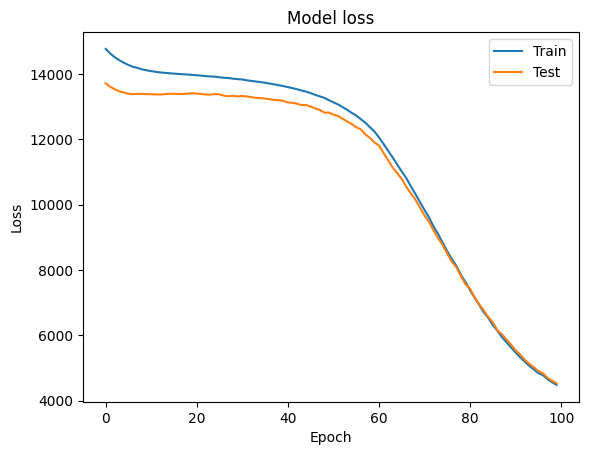

In [30]:
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Bad option: No scaling
model = Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(3, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

history = model.fit(
    X_train, y_train, validation_data=(X_test, y_test),
    epochs=100, batch_size=32, verbose=0)

plot_history(history)

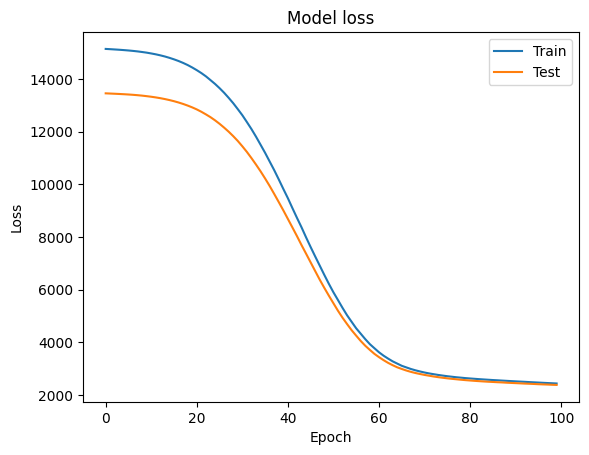

In [31]:
# Option 1: Scale outside of of the neural network architecture
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(3, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100, batch_size=32, verbose=0)

plot_history(history)

In [33]:
# Option 2: Integrate scaling within the model's architecture using Normalization
normalizer = Normalization() # Instantiate a "normalizer" layer
normalizer.adapt(X_train) # "Fit" it on the train set

# Once fitted, you can use it as a function
print(normalizer(X_train).numpy().std())
print(normalizer(X_test).numpy().std())

1.0
0.99552447


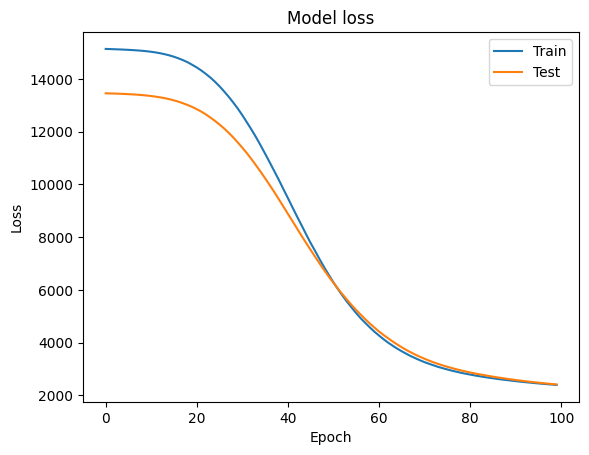

In [34]:
model = Sequential()

# Use the adapted normalizer as first sequential step
model.add(normalizer)
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(3, activation='linear'))

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100, batch_size=32, verbose=0
)

plot_history(history)

# Save and load models

In [ ]:
# Let's say that you have a `model`
# You can save it:
models.save_model(model, 'my_model.keras')

# and you can load it somewhere else:
loaded_model = models.load_model('my_model.keras')